In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import os

import redpandda
from redpandda import *

import resicon
from resicon import *

import geostas
import mdtraj

import MDAnalysis as mda 

import visualizations
import comodo
import hdbscan
import time



In [2]:
from redpandda import preprocessing, preprocess_protein_trajectory
import redpandda_general
from clustering_functions import clustering_workflow
from compare_clusterings import *
import clustering_functions
from timestep_clustering import *

In [3]:
#md_trajectory_info = ['trajectory-1.xtc','fs-peptide.pdb','McGibbon/',10000,4,'mcgib_traj1_geostas_4k.csv','Ace']
md_trajectory_info = ['prod_r1_nojump_prot.xtc','prod_r1_pbc_fit_prot_last.pdb','ProtNo2/',None,None,None,'TLL']
trajectory_nr = 1

#how many frames to process
frames_count = md_trajectory_info[3]

In [4]:

trajectory_file = md_trajectory_info[0].split()[0]
pdb_file = md_trajectory_info[1].split()[0]


In [5]:
md_trajectory_info_dcd = md_trajectory_info.copy()
md_trajectory_info_dcd[0] = "prod_r1_nojump_prot.dcd"
pdb_full_path = os.path.join("trajdata","ProtNo2","prod_r1_pbc_fit_prot_last.pdb")

In [6]:
pdb_trajectory_info = [pdb_file,pdb_file ,'ProtNo2/',None,None,None,'TLL']


In [7]:
save_filename = trajectory_file + "_" + pdb_file + ".pickle"
save_filename_csv = trajectory_file + "_" + pdb_file + ".csv"

In [8]:
# call MD-related preprocessing
traj_array, k_cluster = preprocess_protein_trajectory(md_trajectory_info)

In [9]:
clustering_names = []
clustering_results = []

In [10]:
matrices_to_apply = ["delta",  "delta+1std", "delta+2std", "stddv"]
clusterings_to_apply = [
    {
        "name": "Spectral",
        "method": "spectral",
        "params": {"cluster_count": k_cluster}
    },
        {
        "name": "HDBSCAN",
        "method": "hdbscan",
        "params": {}
    },
        {
        "name": "Affinity",
        "method": "affinity",
        "params": {}
    }
]


In [11]:
clusterings_to_apply

[{'name': 'Spectral', 'method': 'spectral', 'params': {'cluster_count': 16}},
 {'name': 'HDBSCAN', 'method': 'hdbscan', 'params': {}},
 {'name': 'Affinity', 'method': 'affinity', 'params': {}}]

In [12]:
res = clustering_workflow(traj_array, matrices_to_apply, clusterings_to_apply, post_process_noise= True)

0.0235
0.0248
0.0396
0.0233
0.0149
0.0490
0.0114
0.0158


0.0341
0.0121
0.0152
0.0327


In [13]:
res

[{'name': 'Spectral',
  'method': 'spectral',
  'params': {'cluster_count': 16},
  'matrix': 'delta',
  'clustering': array([ 1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,
          1,  8,  8,  8,  8,  8,  8,  8,  8,  8,  2,  2,  2,  2,  2,  2,  0,
          0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  2,  2,  7,
          7,  7,  7,  7,  7,  7,  7,  7,  7,  7,  7,  7,  7,  7,  7,  7,  7,
          7,  7,  7,  7,  6,  6,  6,  6,  6,  7,  7,  7,  7,  7,  9,  9,  9,
          9,  9,  9,  9,  9,  9,  9,  9,  5,  5,  5,  5,  5,  5,  5,  5,  5,
          5,  5,  3,  5,  5,  5,  5,  5,  5, 14, 14, 14, 14, 14, 14, 14, 14,
         14, 14, 14, 14, 14, 14, 14, 14, 14, 14,  6,  6,  6,  6,  6,  6,  6,
          6,  6,  6,  6,  6,  6,  6,  3,  3,  3,  3,  3,  3,  3, 13, 13, 13,
         13, 13, 13, 13, 13, 13, 13, 13, 13, 13, 13, 13, 13, 13, 13, 13,  3,
          3,  3,  3,  3,  3,  3,  5,  5,  5,  5,  5,  5,  5,  5,  5,  5, 15,
         15, 15, 15, 15, 15, 15, 15, 

In [14]:
# create matrices for plotting
dist_matrices = redpandda_general.get_distance_matrices(traj_array)
delta_matrices = redpandda_general.get_delta_matrices(dist_matrices)
delta_matrices_wo_absolute = redpandda_general.get_delta_matrices_wo_absolute(dist_matrices)


average_delta_matrix = redpandda_general.calculate_average_delta_matrix(delta_matrices)
average_delta_matrix_wo_absolute = redpandda_general.calculate_average_delta_matrix(delta_matrices_wo_absolute)

average_distance_matrix = redpandda_general.calculate_average_delta_matrix(dist_matrices)

std_distance_matrix = redpandda_general.get_std_matrices(dist_matrices)
std_delta_matrix = redpandda_general.get_std_matrices(delta_matrices)

stddv_matrices = redpandda_general.get_stddv(dist_matrices)


summed_delta_matrix_1std = average_delta_matrix + std_delta_matrix 
summed_delta_matrix_2std = average_delta_matrix + std_delta_matrix * 2

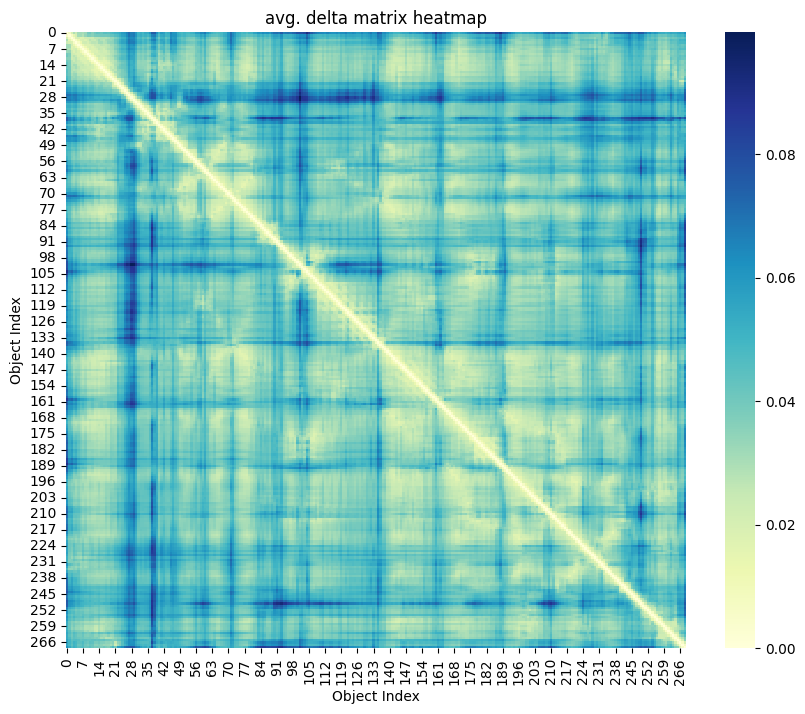

In [15]:
dm.create_delta_heatmap(average_delta_matrix)

In [16]:
for clustering in res:
    curr_clustering = clustering["clustering"]
    Q, _ = cc.get_Q_for_clustering(dist_matrices, curr_clustering, k_cluster)
    clustering["Q"] = Q

## Q values for all clustering methods (lower means better)

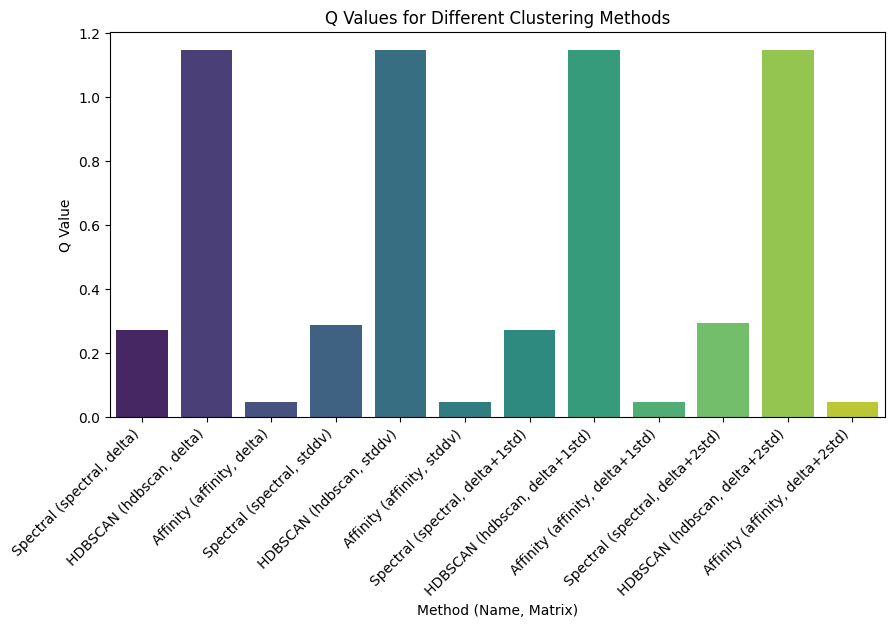

In [17]:
import seaborn as sns
labels = [f"{entry['name']} ({entry['method']}, {entry['matrix']})" for entry in res]
Q_values = [entry['Q'] for entry in res]

# Plot
plt.figure(figsize=(10, 5))
sns.barplot(x=labels, y=Q_values, palette="viridis")

# Labels and title
plt.xlabel("Method (Name, Matrix)")
plt.ylabel("Q Value")
plt.title("Q Values for Different Clustering Methods")
plt.xticks(rotation=45, ha='right')

# Show plot
plt.show()

In [18]:
##### example for postprocessing - is already done in function called above

In [19]:

clustering_hdbscan = res[1]["clustering"]
if -1 in clustering_hdbscan:
    from postprocess_clusterings import assign_noise_points
    final_clustering_hdbscan = assign_noise_points(distance_matrix=delta_matrices, cluster_labels=clustering_hdbscan)

### Visualization of clusterings for each residue
#### clusters are coloured in such a way that the overlap is maximized to facilitate comparison

[array([ 1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,
        1,  8,  8,  8,  8,  8,  8,  8,  8,  8,  2,  2,  2,  2,  2,  2,  0,
        0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  2,  2,  7,
        7,  7,  7,  7,  7,  7,  7,  7,  7,  7,  7,  7,  7,  7,  7,  7,  7,
        7,  7,  7,  7,  6,  6,  6,  6,  6,  7,  7,  7,  7,  7,  9,  9,  9,
        9,  9,  9,  9,  9,  9,  9,  9,  5,  5,  5,  5,  5,  5,  5,  5,  5,
        5,  5,  3,  5,  5,  5,  5,  5,  5, 14, 14, 14, 14, 14, 14, 14, 14,
       14, 14, 14, 14, 14, 14, 14, 14, 14, 14,  6,  6,  6,  6,  6,  6,  6,
        6,  6,  6,  6,  6,  6,  6,  3,  3,  3,  3,  3,  3,  3, 13, 13, 13,
       13, 13, 13, 13, 13, 13, 13, 13, 13, 13, 13, 13, 13, 13, 13, 13,  3,
        3,  3,  3,  3,  3,  3,  5,  5,  5,  5,  5,  5,  5,  5,  5,  5, 15,
       15, 15, 15, 15, 15, 15, 15, 11, 11, 11, 11, 11,  3,  3,  3,  3,  3,
        3,  3, 12, 12, 12, 12, 12, 12, 12, 12, 12, 12, 12, 11, 11, 11, 11,
       11, 11, 11, 11, 1

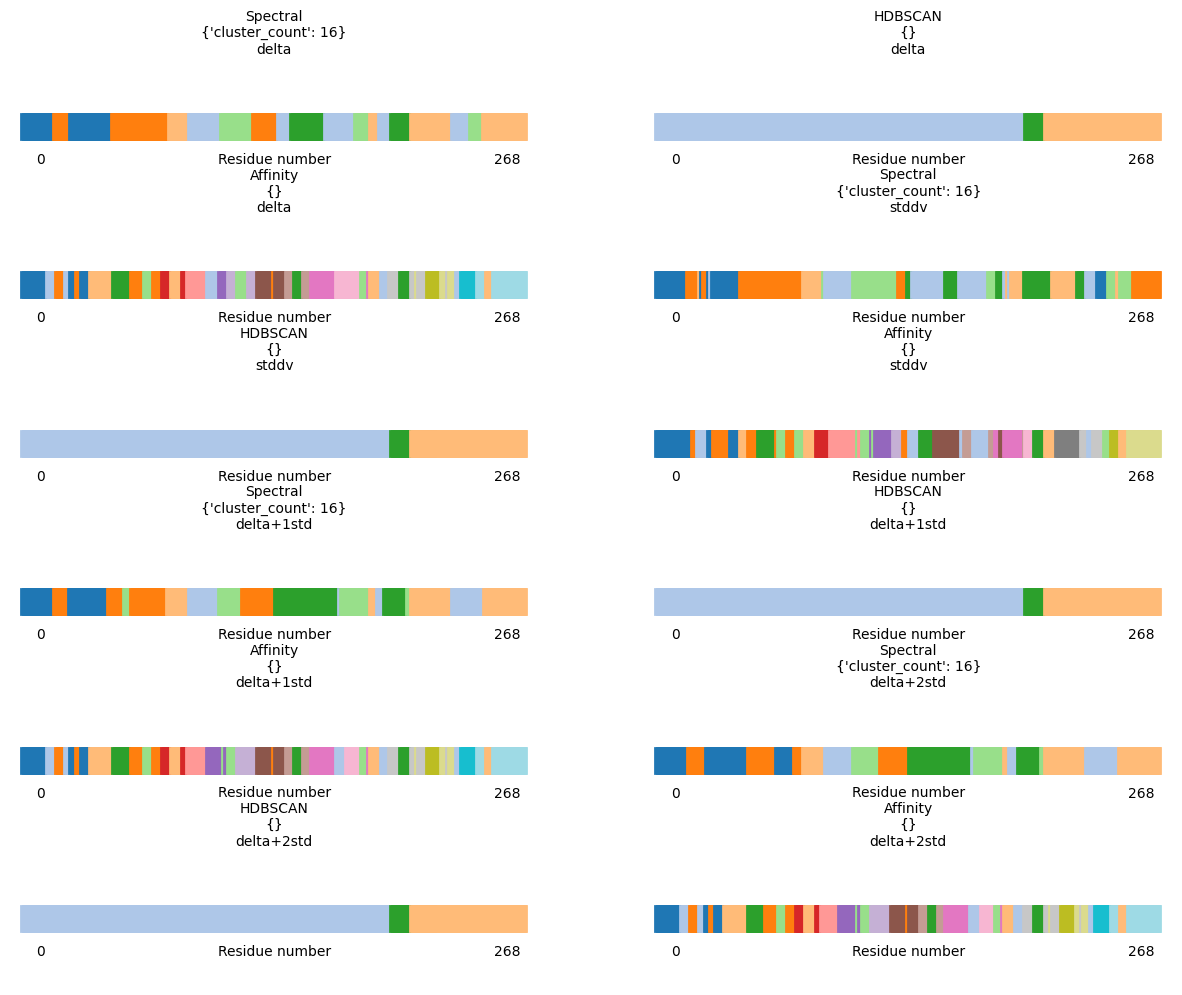

In [20]:
visualizations.line_plot_workflow([item["clustering"] for item in res], titles = [str(item["name"]  + "\n" + str(item["params"]) + "\n" + item["matrix"]) for item in res], full_title = "FS-peptide", rearrange = True, hdb_scan_noise=True, num_cols=2)

# Additional methods - Resicon

In [21]:
resi_dict = dict()


start_time = time.time()

resi_clustering = resicon(md_trajectory_info[0],md_trajectory_info[1],md_trajectory_info[2],k_cluster, only_CA=True)
curr_time = time.time() - start_time 
resi_dict["runtime"] = curr_time

resi_dict["name"] = "Resicon"
resi_dict["method"] = "Resicon"
resi_dict["params"] = ""
resi_dict["clustering"] = np.array(resi_clustering)

Q, _ = cc.get_Q_for_clustering(dist_matrices, resi_dict["clustering"], k=len(np.unique(resi_clustering)))
resi_dict["Q"] = Q
res.append(resi_dict)



18.7289
Resicon residue:
GLU
0
Resicon residue:
VAL
1
Resicon residue:
SER
2
Resicon residue:
GLN
3
Resicon residue:
ASP
4
Resicon residue:
LEU
5
Resicon residue:
PHE
6
Resicon residue:
ASN
7
Resicon residue:
GLN
8
Resicon residue:
PHE
9


Resicon residue:
ASN
10
Resicon residue:
LEU
11
Resicon residue:
PHE
12
Resicon residue:
ALA
13
Resicon residue:
GLN
14
Resicon residue:
TYR
15
Resicon residue:
SER
16
Resicon residue:
ALA
17
Resicon residue:
ALA
18
Resicon residue:
ALA
19
Resicon residue:
TYR
20


Resicon residue:
CYS
21
Resicon residue:
GLY
22
Resicon residue:
LYS
23
Resicon residue:
ASN
24
Resicon residue:
ASN
25
Resicon residue:
ASP
26
Resicon residue:
ALA
27
Resicon residue:
PRO
28
Resicon residue:
ALA
29
Resicon residue:
GLY
30
Resicon residue:
THR
31
Resicon residue:
ASN
32
Resicon residue:
ILE
33


Resicon residue:
THR
34
Resicon residue:
CYS
35
Resicon residue:
THR
36
Resicon residue:
GLY
37
Resicon residue:
ASN
38
Resicon residue:
ALA
39
Resicon residue:
CYS
40
Resicon residue:
PRO
41
Resicon residue:
GLU
42
Resicon residue:
VAL
43
Resicon residue:
GLU
44
Resicon residue:
LYS
45


Resicon residue:
ALA
46
Resicon residue:
ASP
47
Resicon residue:
ALA
48
Resicon residue:
THR
49
Resicon residue:
PHE
50
Resicon residue:
LEU
51
Resicon residue:
TYR
52
Resicon residue:
SER
53
Resicon residue:
PHE
54
Resicon residue:
GLU
55


Resicon residue:
ASP
56
Resicon residue:
SER
57
Resicon residue:
GLY
58
Resicon residue:
VAL
59
Resicon residue:
GLY
60
Resicon residue:
ASP
61
Resicon residue:
VAL
62
Resicon residue:
THR
63
Resicon residue:
GLY
64
Resicon residue:
PHE
65
Resicon residue:
LEU
66
Resicon residue:
ALA
67


Resicon residue:
LEU
68
Resicon residue:
ASP
69
Resicon residue:
ASN
70
Resicon residue:
THR
71
Resicon residue:
ASN
72
Resicon residue:
LYS
73
Resicon residue:
LEU
74
Resicon residue:
ILE
75
Resicon residue:
VAL
76


Resicon residue:
LEU
77
Resicon residue:
SER
78
Resicon residue:
PHE
79
Resicon residue:
ARG
80
Resicon residue:
GLY
81
Resicon residue:
SER
82
Resicon residue:
ARG
83
Resicon residue:
SER
84
Resicon residue:
ILE
85


Resicon residue:
GLU
86
Resicon residue:
ASN
87
Resicon residue:
TRP
88
Resicon residue:
ILE
89
Resicon residue:
GLY
90
Resicon residue:
ASN
91
Resicon residue:
LEU
92
Resicon residue:
ASN
93
Resicon residue:
PHE
94
Resicon residue:
ASP
95


Resicon residue:
LEU
96
Resicon residue:
LYS
97
Resicon residue:
GLU
98
Resicon residue:
ILE
99
Resicon residue:
ASN
100
Resicon residue:
ASP
101
Resicon residue:
ILE
102
Resicon residue:
CYS
103
Resicon residue:
SER
104
Resicon residue:
GLY
105


Resicon residue:
CYS
106
Resicon residue:
ARG
107
Resicon residue:
GLY
108
Resicon residue:
HIS
109
Resicon residue:
ASP
110
Resicon residue:
GLY
111
Resicon residue:
PHE
112
Resicon residue:
THR
113
Resicon residue:
SER
114
Resicon residue:
SER
115
Resicon residue:
TRP
116


Resicon residue:
ARG
117
Resicon residue:
SER
118
Resicon residue:
VAL
119
Resicon residue:
ALA
120
Resicon residue:
ASP
121
Resicon residue:
THR
122
Resicon residue:
LEU
123
Resicon residue:
ARG
124
Resicon residue:
GLN
125
Resicon residue:
LYS
126


Resicon residue:
VAL
127
Resicon residue:
GLU
128
Resicon residue:
ASP
129
Resicon residue:
ALA
130
Resicon residue:
VAL
131
Resicon residue:
ARG
132
Resicon residue:
GLU
133
Resicon residue:
HIS
134
Resicon residue:
PRO
135
Resicon residue:
ASP
136


Resicon residue:
TYR
137
Resicon residue:
ARG
138
Resicon residue:
VAL
139
Resicon residue:
VAL
140
Resicon residue:
PHE
141
Resicon residue:
THR
142
Resicon residue:
GLY
143
Resicon residue:
HIS
144
Resicon residue:
SER
145
Resicon residue:
LEU
146


Resicon residue:
GLY
147
Resicon residue:
GLY
148
Resicon residue:
ALA
149
Resicon residue:
LEU
150
Resicon residue:
ALA
151
Resicon residue:
THR
152
Resicon residue:
VAL
153
Resicon residue:
ALA
154
Resicon residue:
GLY
155
Resicon residue:
ALA
156
Resicon residue:
ASP
157
Resicon residue:
LEU
158
Resicon residue:
ARG
159


Resicon residue:
GLY
160
Resicon residue:
ASN
161
Resicon residue:
GLY
162
Resicon residue:
TYR
163
Resicon residue:
ASP
164
Resicon residue:
ILE
165
Resicon residue:
ASP
166
Resicon residue:
VAL
167
Resicon residue:
PHE
168
Resicon residue:
SER
169
Resicon residue:
TYR
170


Resicon residue:
GLY
171
Resicon residue:
ALA
172
Resicon residue:
PRO
173
Resicon residue:
ARG
174
Resicon residue:
VAL
175
Resicon residue:
GLY
176
Resicon residue:
ASN
177
Resicon residue:
ARG
178
Resicon residue:
ALA
179
Resicon residue:
PHE
180
Resicon residue:
ALA
181


Resicon residue:
GLU
182
Resicon residue:
PHE
183
Resicon residue:
LEU
184
Resicon residue:
THR
185
Resicon residue:
VAL
186
Resicon residue:
GLN
187
Resicon residue:
THR
188
Resicon residue:
GLY
189
Resicon residue:
GLY
190
Resicon residue:
THR
191
Resicon residue:
LEU
192


Resicon residue:
TYR
193
Resicon residue:
ARG
194
Resicon residue:
ILE
195
Resicon residue:
THR
196
Resicon residue:
HIS
197
Resicon residue:
THR
198
Resicon residue:
ASN
199
Resicon residue:
ASP
200
Resicon residue:
ILE
201


Resicon residue:
VAL
202
Resicon residue:
PRO
203
Resicon residue:
ARG
204
Resicon residue:
LEU
205
Resicon residue:
PRO
206
Resicon residue:
PRO
207
Resicon residue:
ARG
208
Resicon residue:
GLU
209
Resicon residue:
PHE
210


Resicon residue:
GLY
211
Resicon residue:
TYR
212
Resicon residue:
SER
213
Resicon residue:
HIS
214
Resicon residue:
SER
215
Resicon residue:
SER
216
Resicon residue:
PRO
217
Resicon residue:
GLU
218
Resicon residue:
TYR
219
Resicon residue:
TRP
220


Resicon residue:
ILE
221
Resicon residue:
LYS
222
Resicon residue:
SER
223
Resicon residue:
GLY
224
Resicon residue:
THR
225
Resicon residue:
LEU
226
Resicon residue:
VAL
227
Resicon residue:
PRO
228
Resicon residue:
VAL
229
Resicon residue:
THR
230


Resicon residue:
ARG
231
Resicon residue:
ASN
232
Resicon residue:
ASP
233
Resicon residue:
ILE
234
Resicon residue:
VAL
235
Resicon residue:
LYS
236
Resicon residue:
ILE
237
Resicon residue:
GLU
238
Resicon residue:
GLY
239


Resicon residue:
ILE
240
Resicon residue:
ASP
241
Resicon residue:
ALA
242
Resicon residue:
THR
243
Resicon residue:
GLY
244
Resicon residue:
GLY
245
Resicon residue:
ASN
246
Resicon residue:
ASN
247
Resicon residue:
GLN
248
Resicon residue:
PRO
249
Resicon residue:
ASN
250
Resicon residue:
ILE
251


Resicon residue:
PRO
252
Resicon residue:
ASP
253
Resicon residue:
ILE
254
Resicon residue:
PRO
255
Resicon residue:
ALA
256
Resicon residue:
HIS
257
Resicon residue:
LEU
258
Resicon residue:
TRP
259
Resicon residue:
TYR
260


Resicon residue:
PHE
261
Resicon residue:
GLY
262
Resicon residue:
LEU
263
Resicon residue:
ILE
264
Resicon residue:
GLY
265
Resicon residue:
THR
266
Resicon residue:
CYS
267
Resicon residue:
LEU
268


697.6747


# Additional methods - Comodo

In [22]:
import visualizations
import comodo

In [23]:
md_trajectory_info[0]

'prod_r1_nojump_prot.xtc'

In [24]:
try:
    comodo_dict = dict()

    start_time = time.time()

    com_pd_eln = comodo.full_comodo_clustering(pdb_full_path, elastic_network=True)
    curr_time = time.time() - start_time 
    comodo_dict["runtime"] = curr_time


    comodo_dict["name"] = "Comodo"
    comodo_dict["method"] = "Comodo"
    comodo_dict["params"] = "Elastic Network"
    comodo_dict["clustering"] = np.array(com_pd_eln)
    Q, _ = cc.get_Q_for_clustering(dist_matrices, comodo_dict["clustering"], k=len(np.unique(com_pd_eln)))
    comodo_dict["Q"] = Q
    res.append(comodo_dict)
except:
    pass

Name of cov-file: ftrajdata/ProtNo2/prod_r1_pbc_fit_prot_last.cov


Name of output file: trajdata/ProtNo2/prod_r1_pbc_fit_prot_last.cov


{}


In [25]:
try:
    comodo_dict = dict()

    start_time = time.time()
    com_pd_no_eln = comodo.full_comodo_clustering(md_trajectory_info_dcd, elastic_network=False)

    curr_time = time.time() - start_time 
    comodo_dict["runtime"] = curr_time


    comodo_dict["name"] = "Comodo"
    comodo_dict["method"] = "Comodo"
    comodo_dict["params"] = "Full Covariance Matrix"
    comodo_dict["clustering"] = np.array(com_pd_no_eln)
    Q, _ = cc.get_Q_for_clustering(dist_matrices, comodo_dict["clustering"], k=len(np.unique(com_pd_eln)))
    comodo_dict["Q"] = Q
    res.append(comodo_dict)
except:
    pass

Name of cov-file: ftrajdata/ProtNo2/prod_r1_nojump_prot.cov
traj
['prod_r1_nojump_prot.dcd', 'prod_r1_pbc_fit_prot_last.pdb', 'ProtNo2/', None, None, None, 'TLL']
prod_r1_nojump_prot.dcd


# Save Files

In [26]:
import pickle

with open(save_filename, 'wb') as pickle_file:
    pickle.dump(res, pickle_file)

df = pd.DataFrame(res)
df.to_csv(save_filename_csv, index=False)

# Save Files

In [27]:
import pickle

with open(save_filename, 'wb') as pickle_file:
    pickle.dump(res, pickle_file)

df = pd.DataFrame(res)
df.to_csv(save_filename_csv, index=False)

In [28]:
df

,name,method,params,matrix,clustering,runtime,Q
0,Spectral,spectral,{'cluster_count': 16},delta,"[1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, ...",17.780819,0.272091
1,HDBSCAN,hdbscan,{},delta,"[1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, ...",17.781404,1.145557
2,Affinity,affinity,{},delta,"[0, 0, 0, 0, 1, 1, 1, 1, 1, 2, 2, 2, 2, 2, 3, ...",17.796142,0.047069
3,Spectral,spectral,{'cluster_count': 16},stddv,"[7, 7, 7, 7, 7, 7, 7, 7, 7, 7, 7, 7, 7, 7, 7, ...",7.958678,0.288518
4,HDBSCAN,hdbscan,{},stddv,"[1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, ...",7.950181,1.145557
5,Affinity,affinity,{},stddv,"[0, 0, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 2, 2, 2, ...",7.984291,0.047404
6,Spectral,spectral,{'cluster_count': 16},delta+1std,"[8, 8, 8, 8, 8, 8, 8, 8, 8, 8, 8, 8, 8, 8, 8, ...",17.768033,0.270239
7,HDBSCAN,hdbscan,{},delta+1std,"[1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, ...",17.772468,1.145557
8,Affinity,affinity,{},delta+1std,"[0, 0, 0, 0, 1, 1, 1, 1, 1, 2, 2, 2, 2, 2, 3, ...",17.790778,0.047069
9,Spectral,spectral,{'cluster_count': 16},delta+2std,"[8, 8, 8, 8, 8, 8, 8, 8, 8, 8, 8, 8, 8, 8, 8, ...",17.768709,0.293220


# Further analyses

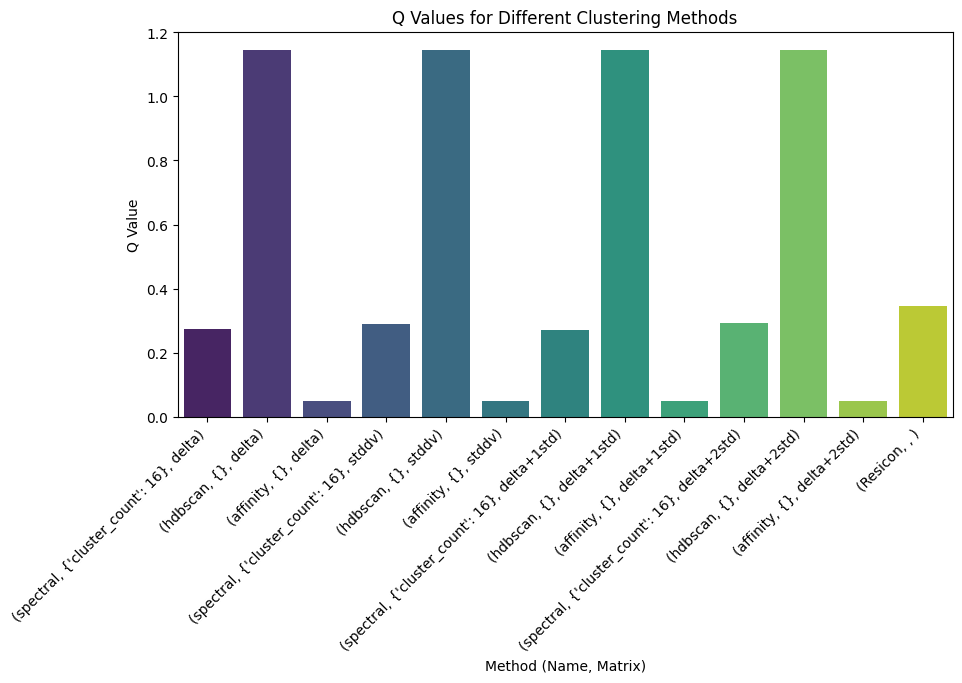

In [29]:
import seaborn as sns
labels = [f"({entry['method']}, {entry['params']}, {entry.get('matrix', '')})" for entry in res]
Q_values = [entry['Q'] for entry in res]

# Plot
plt.figure(figsize=(10, 5))
sns.barplot(x=labels, y=Q_values, palette="viridis")

# Labels and title
plt.xlabel("Method (Name, Matrix)")
plt.ylabel("Q Value")
plt.title("Q Values for Different Clustering Methods")
plt.xticks(rotation=45, ha='right')

# Show plot
plt.show()

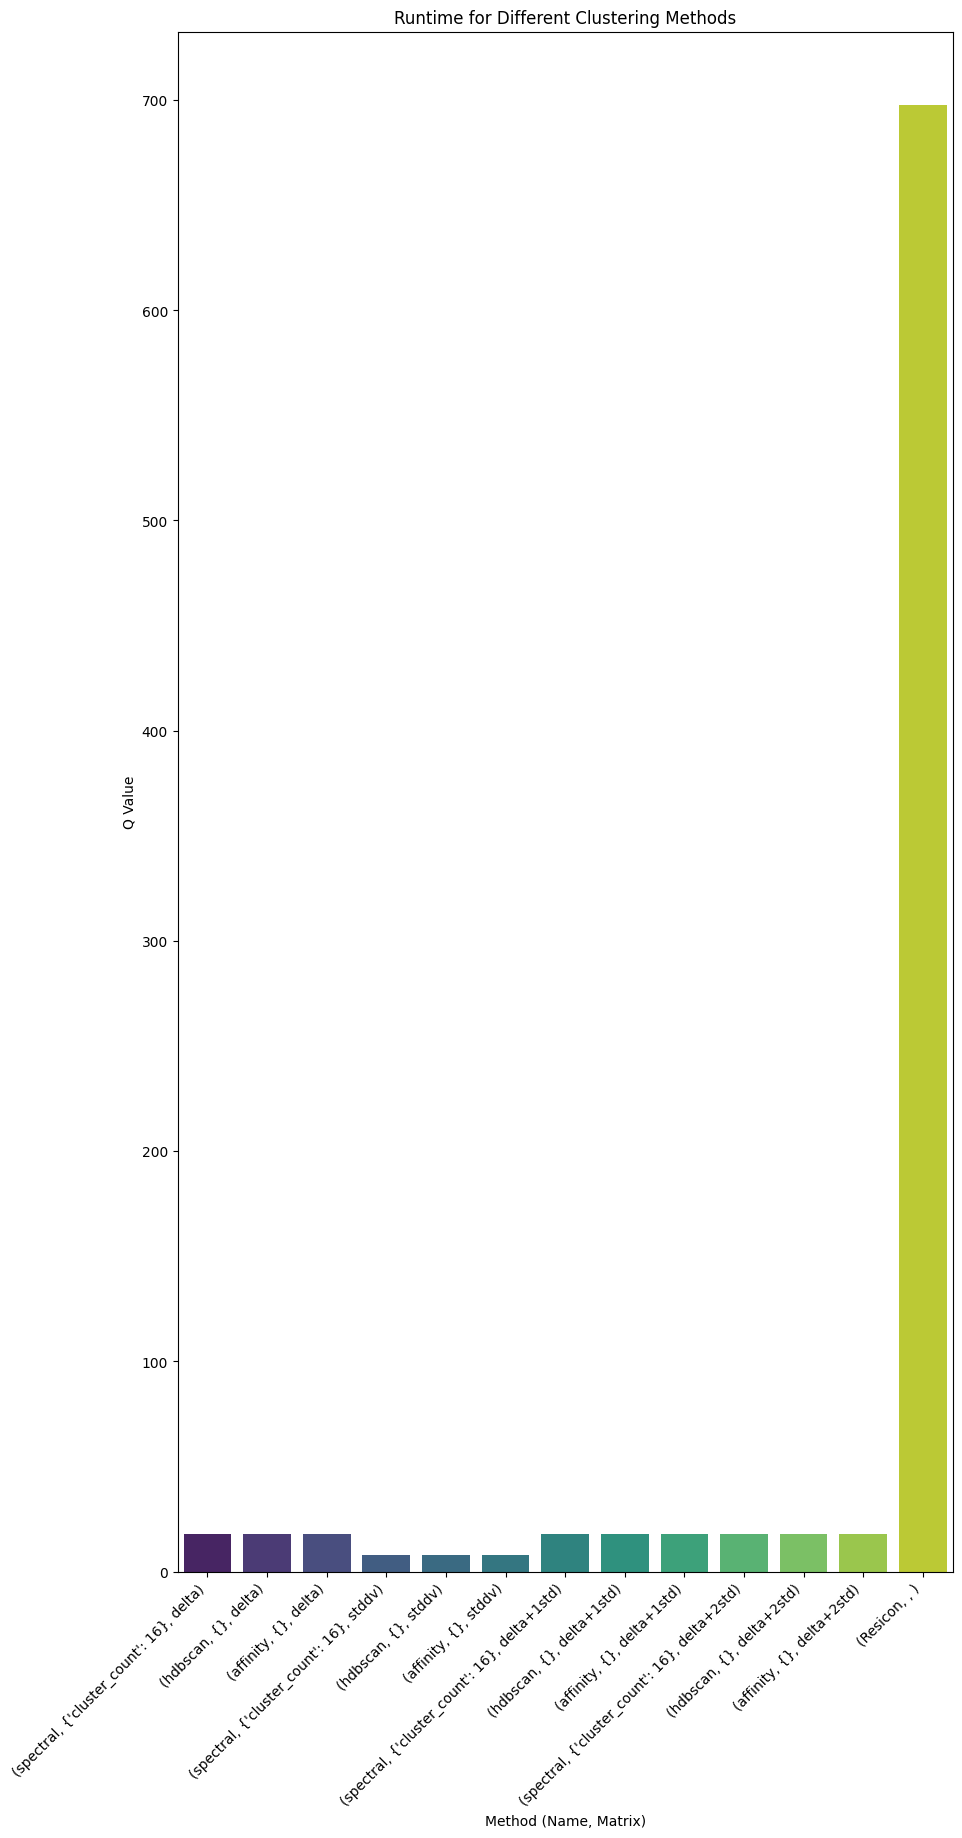

In [30]:
import seaborn as sns
labels = [f"({entry['method']}, {entry['params']}, {entry.get('matrix', '')})" for entry in res]
runtimes = [entry['runtime'] for entry in res]

# Plot
plt.figure(figsize=(10, 20))
sns.barplot(x=labels, y=runtimes, palette="viridis")

# Labels and title
plt.xlabel("Method (Name, Matrix)")
plt.ylabel("Q Value")
plt.title("Runtime for Different Clustering Methods")
plt.xticks(rotation=45, ha='right')

# Show plot
plt.show()

### For the next steps (visualizing of RMSD etc.), we select Spectral Clustering with 4 clusters

In [31]:
spectral_clustering_res = res[0]["clustering"]

In [32]:
from compare_clusterings import *

In [33]:
max_rmse_wo_clustering = get_Q_max_RMSE_wo_clustering(delta_matrices)

In [34]:
spectral_clustering_res

array([ 1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,
        1,  8,  8,  8,  8,  8,  8,  8,  8,  8,  2,  2,  2,  2,  2,  2,  0,
        0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  2,  2,  7,
        7,  7,  7,  7,  7,  7,  7,  7,  7,  7,  7,  7,  7,  7,  7,  7,  7,
        7,  7,  7,  7,  6,  6,  6,  6,  6,  7,  7,  7,  7,  7,  9,  9,  9,
        9,  9,  9,  9,  9,  9,  9,  9,  5,  5,  5,  5,  5,  5,  5,  5,  5,
        5,  5,  3,  5,  5,  5,  5,  5,  5, 14, 14, 14, 14, 14, 14, 14, 14,
       14, 14, 14, 14, 14, 14, 14, 14, 14, 14,  6,  6,  6,  6,  6,  6,  6,
        6,  6,  6,  6,  6,  6,  6,  3,  3,  3,  3,  3,  3,  3, 13, 13, 13,
       13, 13, 13, 13, 13, 13, 13, 13, 13, 13, 13, 13, 13, 13, 13, 13,  3,
        3,  3,  3,  3,  3,  3,  5,  5,  5,  5,  5,  5,  5,  5,  5,  5, 15,
       15, 15, 15, 15, 15, 15, 15, 11, 11, 11, 11, 11,  3,  3,  3,  3,  3,
        3,  3, 12, 12, 12, 12, 12, 12, 12, 12, 12, 12, 12, 11, 11, 11, 11,
       11, 11, 11, 11, 11

In [35]:
max_rmse_for_clustering = get_Q_max_RMSE_for_clustering(delta_matrices, spectral_clustering_res, len(np.unique(spectral_clustering_res)))

In [36]:
traj_array_pdb, k_cluster_pdb = preprocess_protein_trajectory(pdb_trajectory_info)

# For this protein we have an additional pdb-file: We can take this as reference

In [37]:
pdb_dist = redpandda_general.get_distance_matrices(traj_array_pdb)

In [38]:
get_total_rmses_for_frames, cluster_rmses, clusters_mean_rmses = get_RMSE_of_clusters_and_total(pdb_dist, dist_matrices,spectral_clustering_res, len(np.unique(spectral_clustering_res)))

# Plotting of the average RMSE of COMET clusters against the RMSE without clustering

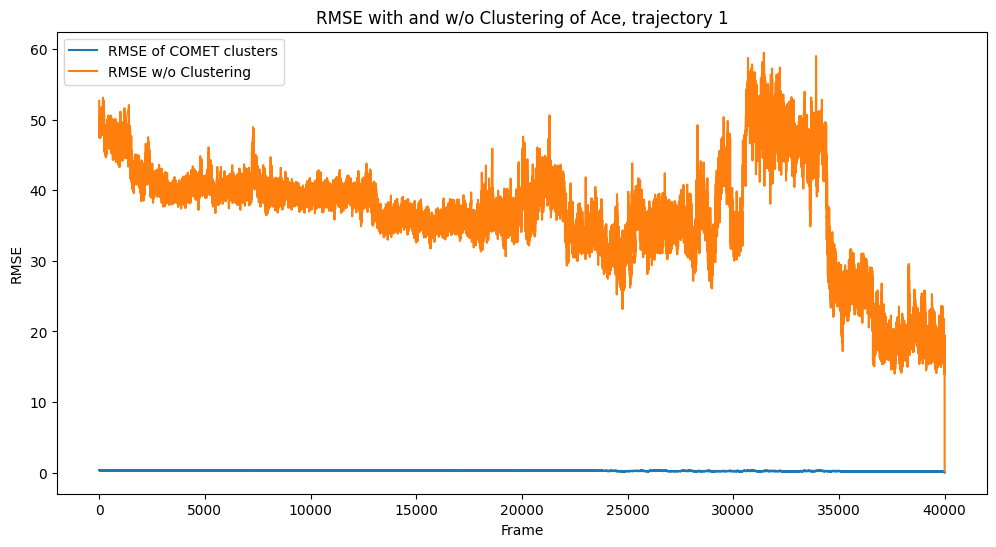

In [39]:
plt.figure(figsize=(12, 6))
plt.plot(clusters_mean_rmses, label="RMSE of COMET clusters")
plt.plot(get_total_rmses_for_frames, label="RMSE w/o Clustering")

plt.xlabel('Frame')  
plt.ylabel('RMSE')  

plt.title('RMSE with and w/o Clustering of Ace, trajectory ' + str(trajectory_nr)) 

plt.legend()

plt.show()

# Plotting of the RMSE of all COMET clusters against the RMSE without clustering

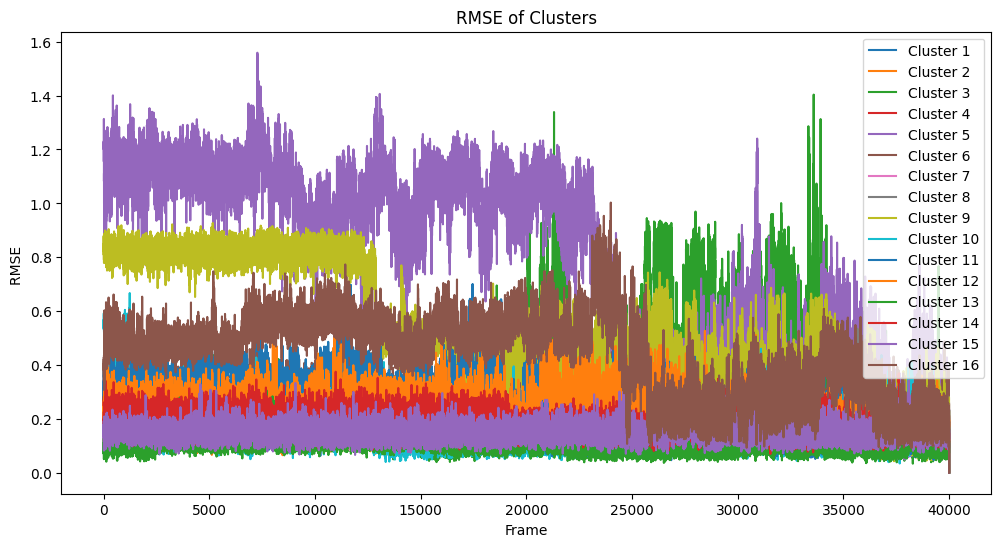

In [40]:
plt.figure(figsize=(12, 6))
for i, cluster_rmse in enumerate(cluster_rmses):    
    plt.plot(cluster_rmse, label=f'Cluster {i+1}')

plt.xlabel('Frame')  
plt.ylabel('RMSE ')  

plt.title('RMSE of Clusters') 

plt.legend()

plt.show()

### Furthermore, we can compute the sum of all delta matrices and compare this to the RMSE.

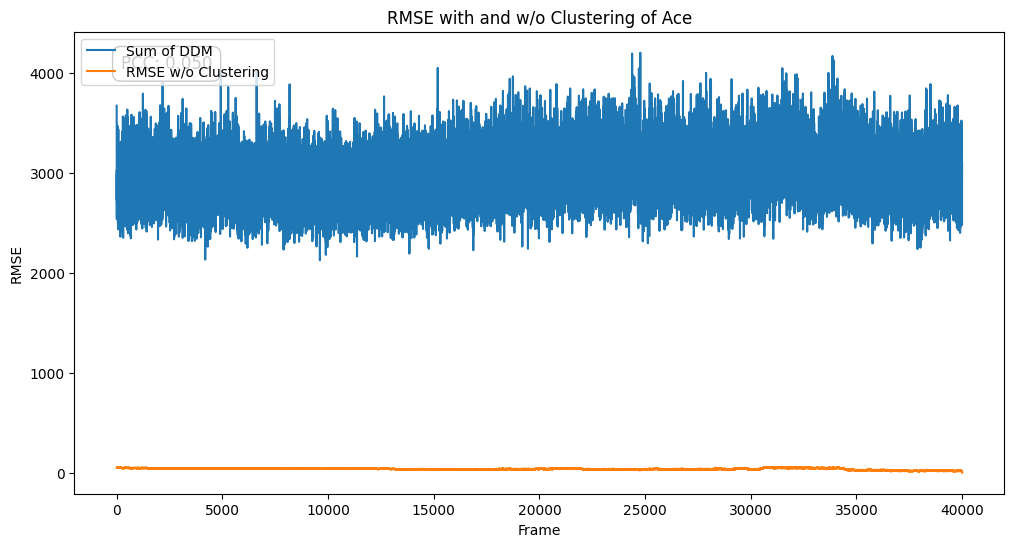

In [41]:
summed_delta_matrices= []
for delta_matrix in delta_matrices:
    summed_delta_matrices.append(dm.sum_up_matrices(delta_matrix.flatten()))

batched_summed_delta_matrices, batched_get_total_rmses_for_frames = get_sdm_batches(summed_delta_matrices,get_total_rmses_for_frames)
import scipy
pcc = scipy.stats.pearsonr(batched_summed_delta_matrices,batched_get_total_rmses_for_frames )[0]


plt.figure(figsize=(12, 6))
plt.plot(summed_delta_matrices, label="Sum of DDM")
plt.plot(get_total_rmses_for_frames, label="RMSE w/o Clustering")

plt.xlabel('Frame')  
plt.ylabel('RMSE')  

plt.title('RMSE with and w/o Clustering of Ace') 


plt.text(
    0.05,  # x-position (percentage of the x-axis range)
    0.95,  # y-position (percentage of the y-axis range)
    f'PCC: {pcc:.3f}',  # Text to display with 3 decimal places
    transform=plt.gca().transAxes,  # Use axis coordinate system (0-1 range)
    fontsize=12,  # Font size of the text
    verticalalignment='top',  # Position the text at the top
    horizontalalignment='left',  # Position the text on the left side
    bbox=dict(facecolor='white', edgecolor='black', boxstyle='round,pad=0.5')  # Box around the text for clarity
)

plt.legend()

plt.show()

##### Only relabeling of the clustering labels array - because code excepts to start clusterings with 0

In [42]:
relabeled_array = relabel_clustering_starting_from_zero(spectral_clustering_res)

### Finally, we can plot the RMSD of clusters against a reference frame of the trajectory (for this frame, the RMSD is, of course, 0) or against the average structure (in case no reference_frame-parameter is passed)

In [43]:
Q_from_pos_trajectory_average = get_RMSD_to_reference(traj_array, relabeled_array, apply_superimposition=None, return_raw=True)
Q_from_pos_trajectory_reference_frame = get_RMSD_to_reference(traj_array, relabeled_array, apply_superimposition=None, reference_frame=0, return_raw=True)
Q_from_pos_trajectory_reference_frame_1000 = get_RMSD_to_reference(traj_array, relabeled_array, apply_superimposition=None, reference_frame=1000, return_raw=True)


Q_from_pos_trajectory_average_kabsch = get_RMSD_to_reference(traj_array, relabeled_array, apply_superimposition="Kabsch",  return_raw=True)
Q_from_pos_trajectory_reference_frame_kabsch = get_RMSD_to_reference(traj_array, relabeled_array, apply_superimposition="Kabsch", reference_frame=0, return_raw=True)
Q_from_pos_trajectory_reference_frame_1000_kabsch = get_RMSD_to_reference(traj_array, relabeled_array, apply_superimposition="Kabsch", reference_frame=1000, return_raw=True)


Q_from_pos_trajectory_average_procrustes = get_RMSD_to_reference(traj_array, relabeled_array, apply_superimposition="procrustes",  return_raw=True)
Q_from_pos_trajectory_reference_frame_procrustes = get_RMSD_to_reference(traj_array, relabeled_array, apply_superimposition="procrustes", reference_frame=0, return_raw=True)
Q_from_pos_trajectory_reference_frame_1000_procrustes = get_RMSD_to_reference(traj_array, relabeled_array, apply_superimposition="procrustes", reference_frame=1000, return_raw=True)

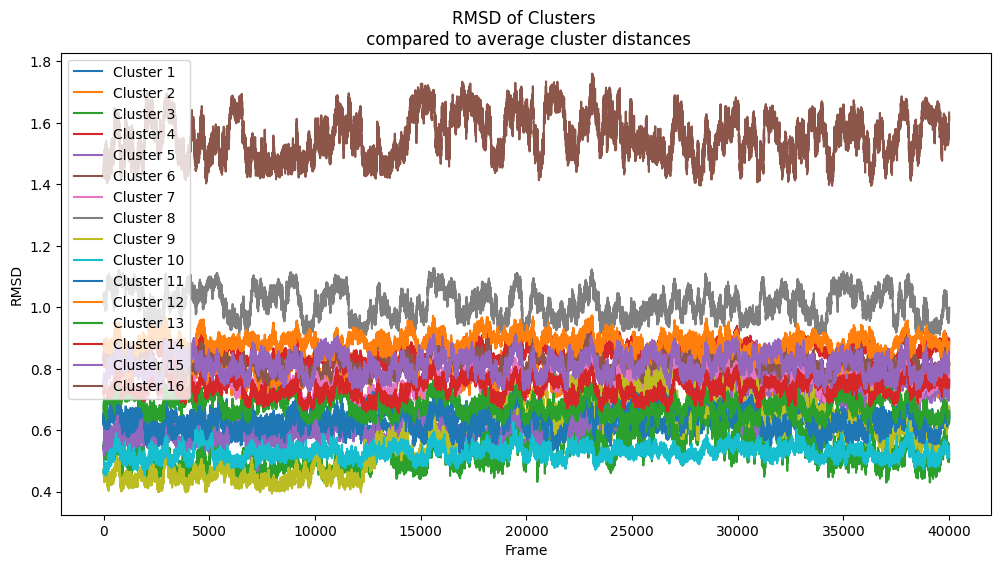

In [44]:
plt.figure(figsize=(12, 6))
for i, cluster_q in enumerate(Q_from_pos_trajectory_average):    
    plt.plot(cluster_q, label=f'Cluster {i+1}')

plt.xlabel('Frame')  
plt.ylabel('RMSD')  

plt.title('RMSD of Clusters \n compared to average cluster distances') 

plt.legend()

plt.show()

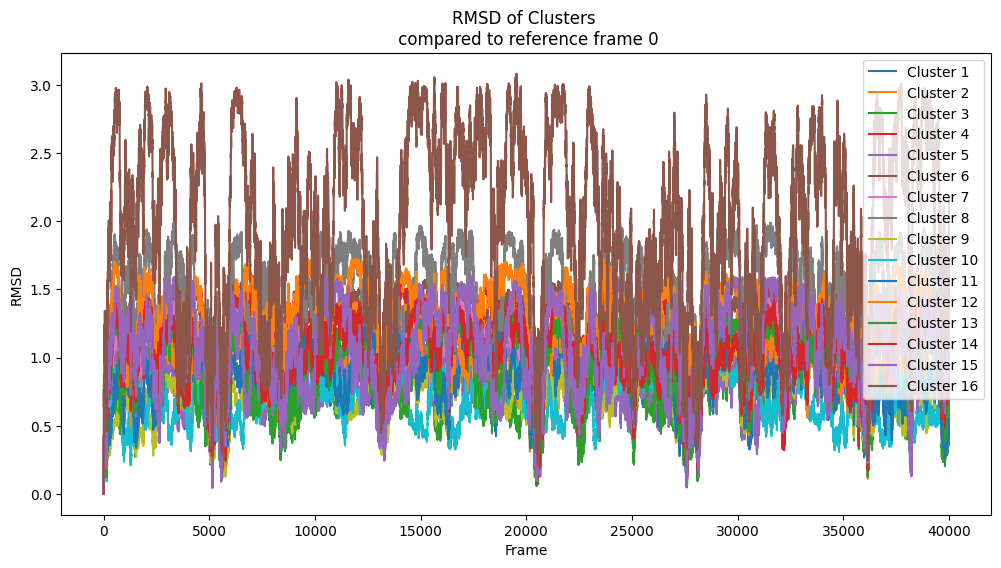

In [45]:
plt.figure(figsize=(12, 6))
for i, cluster_q in enumerate(Q_from_pos_trajectory_reference_frame):    
    plt.plot(cluster_q, label=f'Cluster {i+1}')

plt.xlabel('Frame')  
plt.ylabel('RMSD')  

plt.title('RMSD of Clusters \n compared to reference frame 0') 

plt.legend()

plt.show()

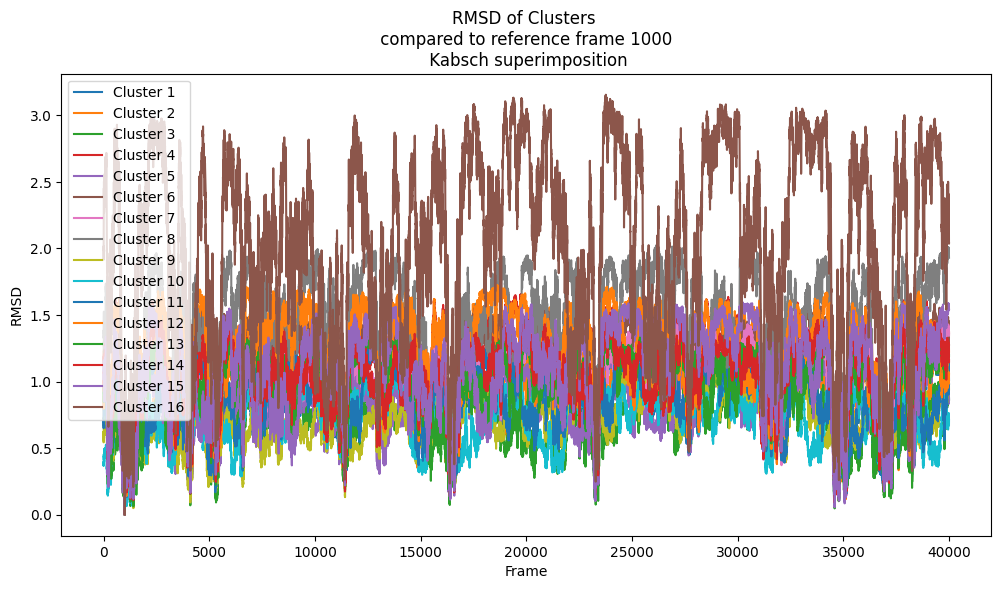

In [46]:
plt.figure(figsize=(12, 6))
for i, cluster_q in enumerate(Q_from_pos_trajectory_reference_frame_1000_kabsch):    
    plt.plot(cluster_q, label=f'Cluster {i+1}')

plt.xlabel('Frame')  
plt.ylabel('RMSD')  

plt.title('RMSD of Clusters \n compared to reference frame 1000 \n Kabsch superimposition') 

plt.legend()

plt.show()

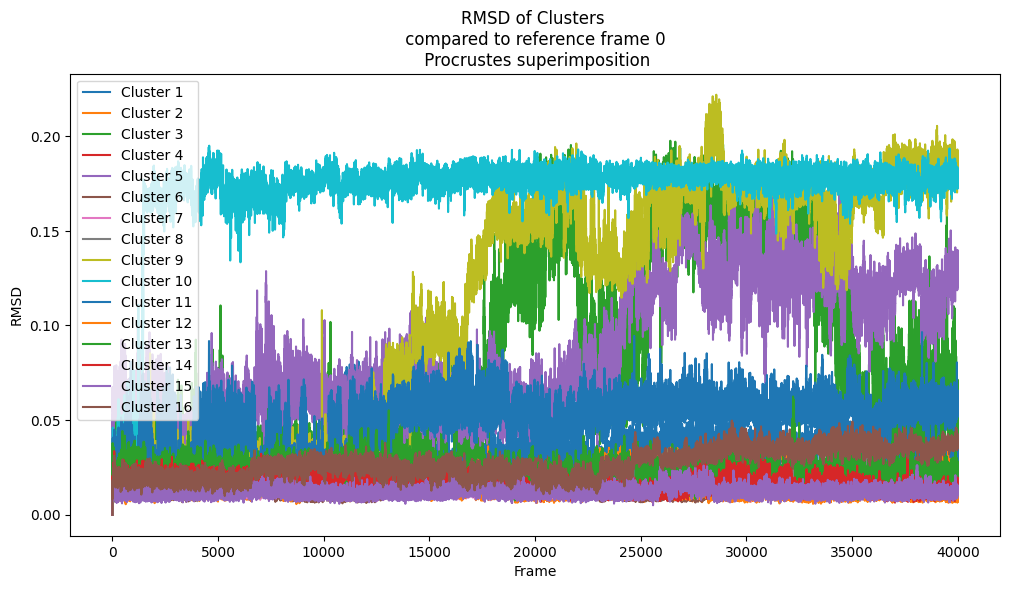

In [47]:
plt.figure(figsize=(12, 6))
for i, cluster_q in enumerate(Q_from_pos_trajectory_reference_frame_procrustes):    
    plt.plot(cluster_q, label=f'Cluster {i+1}')

plt.xlabel('Frame')  
plt.ylabel('RMSD')  

plt.title('RMSD of Clusters \n compared to reference frame 0 \n Procrustes superimposition') 

plt.legend()

plt.show()

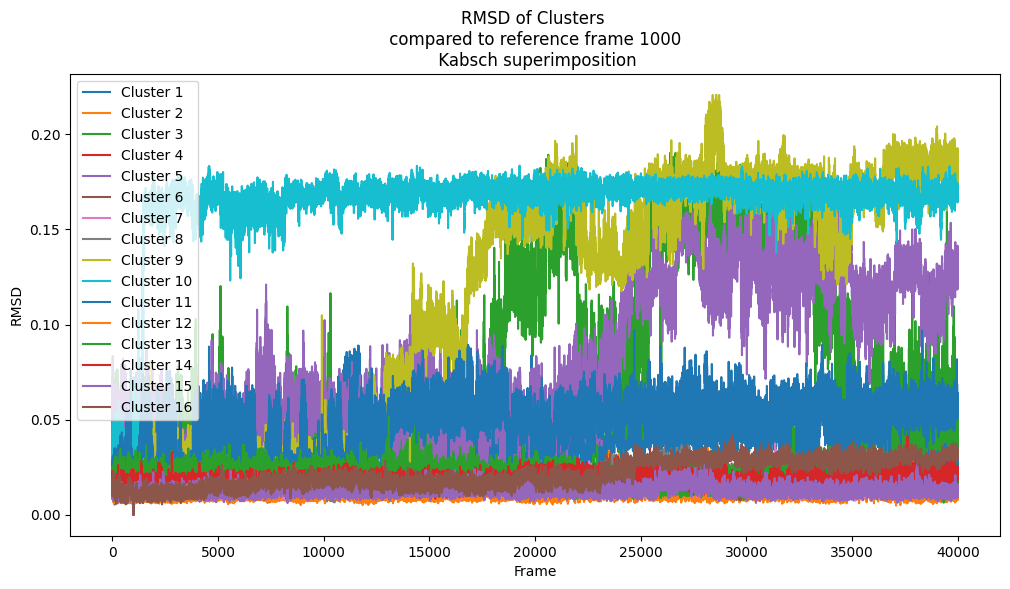

In [48]:
plt.figure(figsize=(12, 6))
for i, cluster_q in enumerate(Q_from_pos_trajectory_reference_frame_1000_procrustes):    
    plt.plot(cluster_q, label=f'Cluster {i+1}')

plt.xlabel('Frame')  
plt.ylabel('RMSD')  

plt.title('RMSD of Clusters \n compared to reference frame 1000 \n Kabsch superimposition') 

plt.legend()

plt.show()

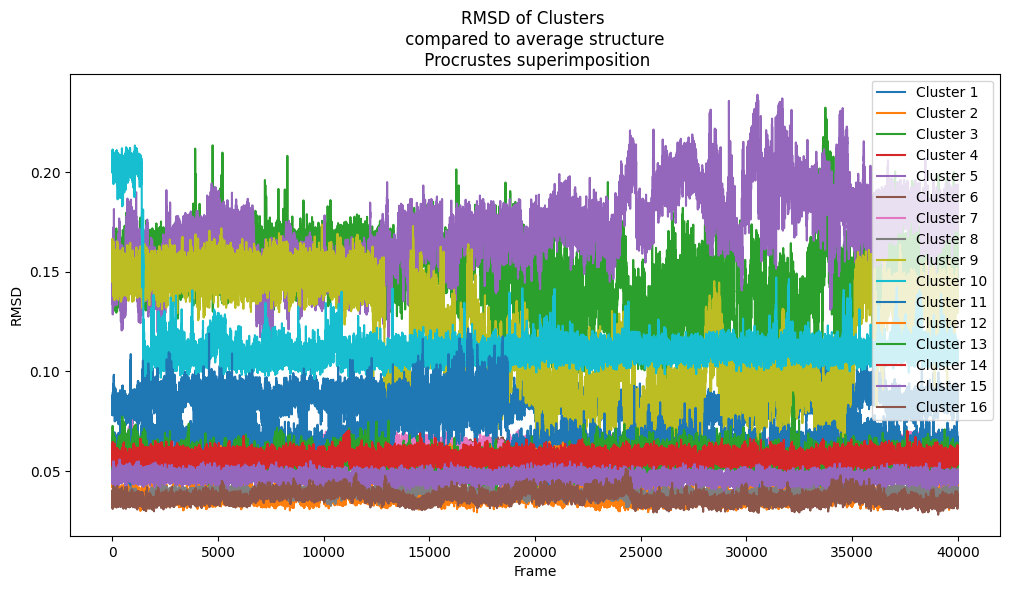

In [49]:
plt.figure(figsize=(12, 6))
for i, cluster_q in enumerate(Q_from_pos_trajectory_average_procrustes):    
    plt.plot(cluster_q, label=f'Cluster {i+1}')

plt.xlabel('Frame')  
plt.ylabel('RMSD')  

plt.title('RMSD of Clusters \n compared to average structure \n Procrustes superimposition') 

plt.legend()

plt.show()

## Finally, we can refine the result by iterative clustering of time segments. We get the time segments from detecting changes in the Q-values of the clusters (as plotted above). For each time segment, we repeat the clustering. For the small protein, the clusterings are very similar for each time segment, but for trajectories with major changes, the clusterings will be highly different. To obtain consistent clusters, we apply the Munkres-algorithm: The clustering labels are reorded in such a way that the overlap is maximized.

In [50]:
timestep_clusters, final_Qs = iterative_clustering_approach(traj_array, delta_matrices, Q_from_pos_trajectory_average_procrustes, compute_Q=True, k_cluster=k_cluster)